In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
company_dummies = pd.get_dummies(df.company)
job_dummies = pd.get_dummies(df.job)
degree_dummies = pd.get_dummies(df.degree)

In [4]:
dummies = pd.concat([company_dummies, job_dummies, degree_dummies], axis="columns")
dummies.head()

,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0


In [5]:
dummies.drop(["abc pharma", "business manager", "bachelors"], axis="columns", inplace=True)

In [6]:
df.drop(["company", "job", "degree"], axis="columns", inplace=True)

In [7]:
df = pd.concat([dummies, df], axis="columns")

In [8]:
x = df.drop(["salary_more_then_100k"], axis="columns")
y = df.salary_more_then_100k

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier()

In [12]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [13]:
dtc.score(xtest, ytest)

0.75

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_predicted = dtc.predict(xtest)

In [16]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [17]:
import seaborn as sb

Text(51.0, 0.5, 'truth')

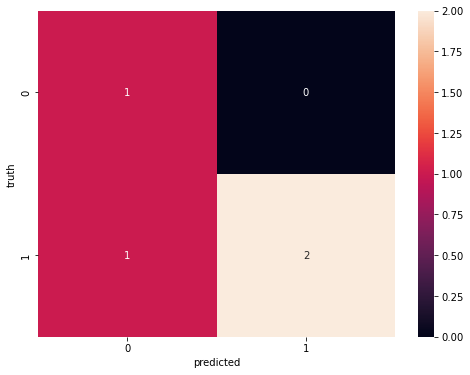

In [18]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [19]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.drop(["customer_id"], axis="columns", inplace=True)

In [21]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
country_dummies = pd.get_dummies(df.country, prefix="country")
gender_dummies = pd.get_dummies(df.gender, prefix="gender")

In [23]:
dummies = pd.concat([country_dummies, gender_dummies], axis="columns")

In [24]:
df.drop(["country", "gender"], axis="columns", inplace=True)

In [25]:
df = pd.concat([dummies, df], axis="columns")

In [26]:
x = df.drop(["churn"], axis="columns")
y = df.churn

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
xtrain_scaled = scaler.fit_transform(xtrain)

In [30]:
dtc.fit(xtrain_scaled, ytrain)

DecisionTreeClassifier()

In [31]:
xtest_scaled = scaler.fit_transform(xtest)

In [32]:
dtc.score(xtest_scaled, ytest)

0.7856

In [33]:
y_predicted = dtc.predict(xtest_scaled)

In [34]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[1692,  288],
       [ 248,  272]], dtype=int64)

Text(51.0, 0.5, 'truth')

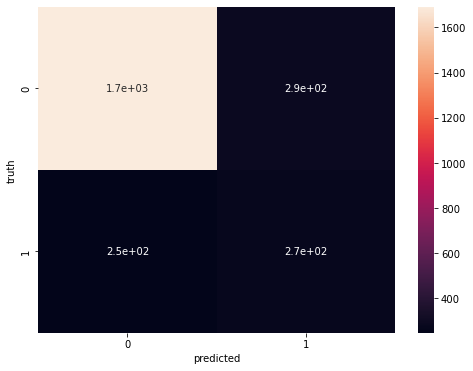

In [35]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [36]:
df = pd.read_csv("smoke_detection_iot.csv")
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [37]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [38]:
df.groupby("Fire Alarm").mean()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
Fire Alarm,,,,,,,,,,,,,,,
0,41652.891177,1.654860e+09,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259,2410.608851
1,27186.027013,1.654765e+09,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627,13746.303439


In [39]:
df.drop(["Unnamed: 0", "UTC"], axis="columns", inplace=True)

In [40]:
df.groupby("Fire Alarm").describe()

Temperature[C]                                                      \
                    count       mean        std    min     25%    50%     75%   
Fire Alarm                                                                      
0                 17873.0  19.694803  14.982932 -22.01  13.560  20.54  26.919   
1                 44757.0  14.483152  13.825585 -22.01   5.179  20.02  24.730   

                  Humidity[%]             ...  NC2.5                 CNT  \
              max       count       mean  ...    75%        max    count   
Fire Alarm                                ...                              
0           59.93     17873.0  42.930077  ...  0.048  26916.836  17873.0   
1           41.41     44757.0  50.779534  ...  0.052  30026.438  44757.0   

                                                                               
                    mean          std  min     25%      50%      75%      max  
Fire Alarm                                                                     
0            2410.608851  1566.158930  0.0  1109.0   2226.0   3509.0   5743.0  
1           13746.303439  6567.377792  3.0  8210.0  13804.0  19399.0  24993.0  

[2 rows x 104 columns]

In [41]:
df_fire_alarm_1 = df[df["Fire Alarm"] == 1]
df_fire_alarm_0 = df[df["Fire Alarm"] == 0]

In [42]:
df_equal = pd.concat([df_fire_alarm_0, df_fire_alarm_1[0:df_fire_alarm_0.shape[0]]])
df_equal.groupby("Fire Alarm").describe()

Temperature[C]                                               \
                    count       mean        std     min    25%     50%   
Fire Alarm                                                               
0                 17873.0  19.694803  14.982932 -22.010  13.56  20.540   
1                 17873.0   7.149965  10.532617  -9.276  -4.38  11.746   

                           Humidity[%]             ...  NC2.5             \
               75%     max       count       mean  ...    75%        max   
Fire Alarm                                         ...                     
0           26.919  59.930     17873.0  42.930077  ...  0.048  26916.836   
1           16.860  20.852     17873.0  51.652367  ...  0.052      0.665   

                CNT                                                      \
              count          mean          std     min     25%      50%   
Fire Alarm                                                                
0           17873.0   2410.608851  1566.158930     0.0  1109.0   2226.0   
1           17873.0  12114.000000  5159.635016  3178.0  7646.0  12114.0   

                              
                75%      max  
Fire Alarm                    
0            3509.0   5743.0  
1           16582.0  21050.0  

[2 rows x 104 columns]

In [43]:
df_equal.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [44]:
x = df.drop(["Fire Alarm"], axis="columns")
y = df["Fire Alarm"]

In [45]:
x_scaled = scaler.fit_transform(x)

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [47]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [48]:
dtc.score(xtest, ytest)

1.0

In [49]:
y_predicted = dtc.predict(xtest)

In [50]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[ 4540,     0],
       [    0, 11118]], dtype=int64)

Text(51.0, 0.5, 'truth')

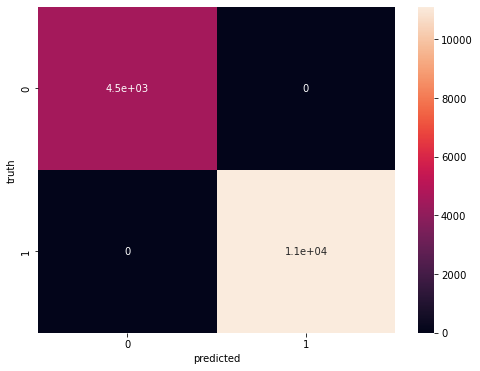

In [51]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [52]:
df = pd.read_csv("Data_Science_Fields_Salary_Categorization.csv")
df.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [53]:
df.drop(["Unnamed: 0", "Working_Year"], axis="columns", inplace=True)

In [54]:
df.head()

,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [56]:
df.Designation = encoder.fit_transform(df.Designation)
df.Experience = encoder.fit_transform(df.Experience)
df.Employee_Location = encoder.fit_transform(df.Employee_Location)
df.Company_Location = encoder.fit_transform(df.Company_Location)
df.Company_Size = encoder.fit_transform(df.Company_Size)
df.Employment_Status = encoder.fit_transform(df.Employment_Status)

In [57]:
df.Salary_In_Rupees = df.Salary_In_Rupees.str.replace(",", "").astype("float")

In [58]:
x = df.drop(["Remote_Working_Ratio"], axis="columns")
y = df.Remote_Working_Ratio

In [59]:
x_scaled  = scaler.fit_transform(x)

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [62]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [63]:
dtc.score(xtest, ytest)

0.5789473684210527

In [66]:
dtc.predict(xtest[100:101])

array([0], dtype=int64)

In [67]:
y_predicted = dtc.predict(xtest)

In [69]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[13,  2, 18],
       [ 4, 12, 10],
       [17, 13, 63]], dtype=int64)

Text(51.0, 0.5, 'truth')

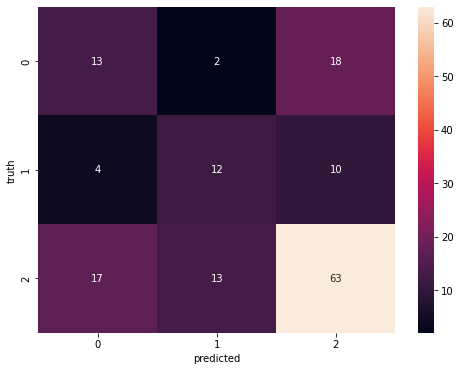

In [70]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")